In [1]:
import numpy as np
import pandas as pd
import os
import sys

from IPython.display import display
from scipy.stats import pearsonr
from scipy.cluster import hierarchy as hac

from random import randint
from scipy.stats import halfnorm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
object_arr = np.arange(0,763)
num_obj = len(object_arr)

fac = 10.

In [3]:
''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''

corr_matrix_cc = np.loadtxt('xobject_corr_matrix_cos.dat')
# corr_diff_matrix_cc = np.loadtxt('xobject_corr_diff_matrix_cos.dat')
print(np.nanmax(corr_matrix_cc))

1.8013457568030884


In [4]:
''' create linkage vector for CC'''
obj_analyze = np.loadtxt('objects_to_analyze_reduced.dat').astype(np.int)
num_analyze = len(obj_analyze)

dist_corr_matrix = corr_matrix_cc
# dist_corr_diff_matrix = 1 - corr_diff_matrix_cc

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
# 				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
	
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)

c_corr_matrix_cc = c_corr_matrix
# c_corr_diff_matrix_cc = c_corr_diff_matrix


In [5]:
# ''' create linkage vector for ACG'''

# c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

# index = 0
# for ii in range(0,num_obj):
# 	if np.any(obj_analyze == ii):
# 		for jj in range(ii+1,num_obj):
# 			if np.any(obj_analyze == jj):
# 				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
# 				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
				
# 				index+= 1 

# '''normalize things'''
# # c_corr_matrix/= np.std(c_corr_matrix)
# # c_corr_diff_matrix/= np.std(c_corr_diff_matrix)

# c_corr_matrix_acg = c_corr_matrix
# c_corr_diff_matrix_acg = c_corr_diff_matrix


In [6]:
# ''' create linkage vector for ACO'''
# # obj_analyze = np.loadtxt('objects_to_analyze.dat')
# # num_analyze = len(obj_analyze)

# c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

# index = 0
# for ii in range(0,num_obj):
# 	if np.any(obj_analyze == ii):
# 		for jj in range(ii+1,num_obj):
# 			if np.any(obj_analyze == jj):
# 				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
# 				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
				
# 				index+= 1 

# '''normalize things'''
# # c_corr_matrix/= np.std(c_corr_matrix)
# # c_corr_diff_matrix/= np.std(c_corr_diff_matrix)

# c_corr_matrix_aco = c_corr_matrix
# c_corr_diff_matrix_aco = c_corr_diff_matrix


In [7]:
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 6}

matplotlib.rc('font', **font)

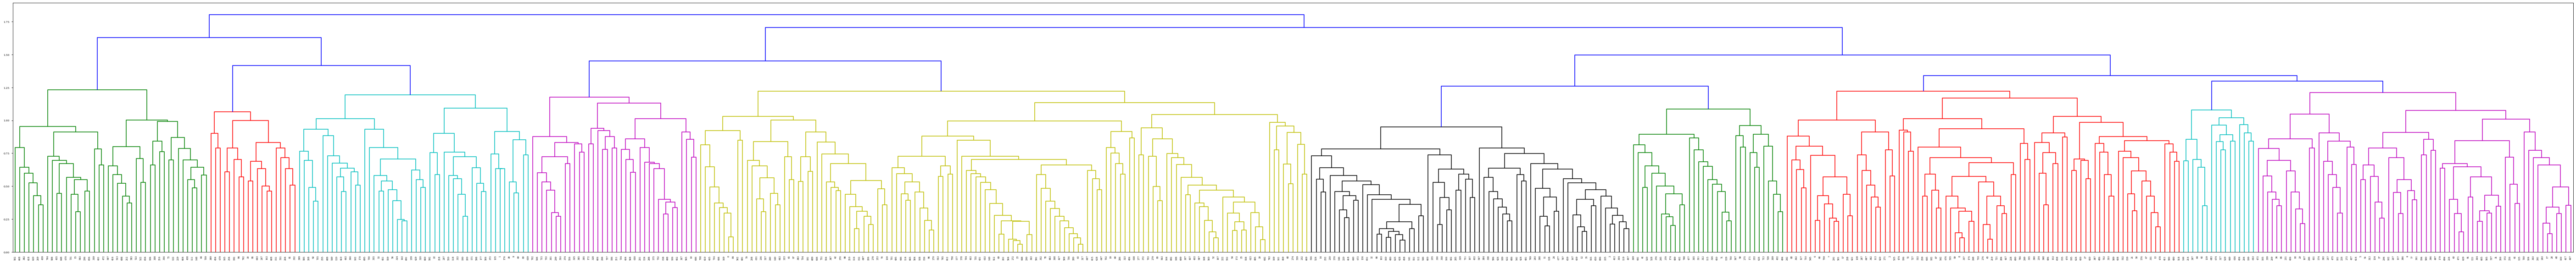

In [8]:
''' PLOT dist combine '''
folder = './cos/'
METHOD = 'complete'

c_matrix_total_cc  = c_corr_matrix_cc 

c_matrix_total = c_matrix_total_cc
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze)

plt.savefig(folder+'plot_hac_cos_cc_'+METHOD+'_v0.pdf', dpi=400)


In [29]:
''' EXTRACT CLUSTERS '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc
c_matrix_total = c_matrix_total_cc

links = hac.linkage(c_matrix_total, method=METHOD)

fc = hac.fcluster(links, t=0.65, criterion='distance')

print(fc.max())
print(fc)
num_clusters = fc.max()
cluster_arr = np.arange(1,num_clusters+1)
num_in_cluster = np.zeros(num_clusters).astype(np.int)
for ii in range(0,num_clusters):
	num_in_cluster[ii] = np.sum(fc == cluster_arr[ii])

print(num_in_cluster)
ordered_num_in_cluster = np.argsort(num_in_cluster)
print(num_in_cluster[ordered_num_in_cluster[-10:]])
big_clusters = cluster_arr[ordered_num_in_cluster[-10:]]
big_clusters = big_clusters[::-1]
print(big_clusters)

fc_out = np.zeros(len(fc)).astype(np.int) -1
for ii in range(0,10):
	fc_out[fc == big_clusters[ii]] = ii
print(fc_out)

num_clusters=10
outfile = folder+'hac_cos_cc_'+METHOD+'_'+str(num_clusters)+'clusters_v10.dat'
np.savetxt(outfile, fc_out, fmt='%d')

228
[ 80  50 155 129 214 212 150 150 162  52  76 129 129 180 124   4 224 202
 105 180  45  98 129 113 175 224 202  29 221 124 201 129 213  52 113 221
 132  91  20 162 189 119  52 180 212 113  41 113  41 150 141 162 104 222
  99 189  87 150 180 224  98  92 136 157  18 214  99  86  53  31  80 201
 111 161 149 124 221  34  27  29  95  87  92 224 206 215 124 227 201  72
 202  95 117  20 124 153  95 136  92  47 129  37 221  19  74 222 148 129
 136  92 213  50 124 154 189  84 124  41 187 124 129  20  98  33  92 169
 172  95 214  72 180 124 118  37  30 116  26 126 113  80  37 145  62 113
 133 162  50  48 220  90 161  14  66 113 114 128  47  28 216 174 159 126
 197  47  75 199  92  85 201  92  67  10 188  16  45 162 124 113  88 221
 129 206 163  22 124 202 121 144 168 126  84  42  84 225 152 224  64 133
 204  30 162 165 124  92  26  40 222 206 150 161  98  31 221 214  34   1
  95 156  98 210 119 142 162 109  92 111  99 162 126 103 153  73  98 150
 129 213   4  49  55  55 226 129 113  15 146 17

In [22]:
new_objects_to_analyze = obj_analyze[fc_out>-1]
print(new_objects_to_analyze)
np.savetxt('objects_to_analyze_reduced_cos_'+METHOD+'_v10.dat', new_objects_to_analyze, fmt='%d')

[  3   8  11  12  14  23  24  25  31  32  35  39  40  45  52  54  59  63
  69  78  90  91  96 103 108 112 114 119 121 128 136 141 146 147 149 156
 160 166 168 173 175 187 189 197 219 220 222 224 225 230 235 248 252 261
 266 270 272 276 280 284 285 290 293 304 307 317 329 330 337 338 352 358
 363 364 368 384 398 401 402 403 407 409 413 418 424 426 427 428 433 440
 446 448 457 458 463 467 471 480 481 483 485 495 504 505 509 512 524 535
 537 541 546 551 552 555 558 560 564 570 587 591 596 605 622 623 625 629
 633 642 650 651 659 665 673 676 677 686 696 699 701 704 711 718 721 735
 736 747]


In [27]:
''' EXTRACT CLUSTERS '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc
c_matrix_total = c_matrix_total_cc

links = hac.linkage(c_matrix_total, method=METHOD)

fc = hac.fcluster(links, t=0.2, criterion='distance')

print('Number of clusters: '+str(fc.max()))
# print(fc)
num_clusters = fc.max()
cluster_arr = np.arange(1,num_clusters+1)
num_in_cluster = np.zeros(num_clusters).astype(np.int)
for ii in range(0,num_clusters):
	num_in_cluster[ii] = np.sum(fc == cluster_arr[ii])

print('Number in each cluster: '+str(num_in_cluster))
print('Number of clusters with >1 blazars: '+str(np.sum(num_in_cluster>1)))
ordered_num_in_cluster = np.argsort(num_in_cluster)
print(num_in_cluster[ordered_num_in_cluster[-21:]])
big_clusters = cluster_arr[ordered_num_in_cluster[-21:]]
big_clusters = big_clusters[::-1]
print(big_clusters)

fc_out = np.zeros(len(fc)).astype(np.int) -1
for ii in range(0,21):
	fc_out[fc == big_clusters[ii]] = ii
print(fc_out)

num_clusters=21
outfile = folder+'hac_cos_cc_'+METHOD+'_'+str(num_clusters)+'clusters_vHC.dat'
np.savetxt(outfile, fc_out, fmt='%d')

Number of clusters: 514
Number in each cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 4 2 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 7 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [28]:
new_objects_to_analyze = obj_analyze[fc_out>-1]
print(new_objects_to_analyze)
np.savetxt('objects_to_analyze_reduced_cos_'+METHOD+'_vHC.dat', new_objects_to_analyze, fmt='%d')

[  0   8  11  12  13  17  23  25  28  35  39  45  52  54  59  63  69  84
  90  96 103 116 119 128 141 152 160 173 187 219 261 270 272 280 290 317
 337 363 409 428 448 457 458 471 478 480 485 509 551 558 560 564 625 629
 642 736]


In [13]:
# ''' PLOT dist combine '''
# METHOD = 'complete'

# c_matrix_total_cc = c_corr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total_cc = c_corr_tr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corrtr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


In [14]:
# print(c_corr_diff_matrix_cc_med)